# ДЗ 1, часть 1. Метод максимального правдоподобия

Имя, Фамилия: Вадим Палысаев

группа: 223

**Оценка(для проверяющего):** 0 из 10

**Дедлайн:** одновременно с частью 3

In [8]:
#all imports here please
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#... add your own if necessary

## Задача 1. Свойства ММП оценок для модели нормального распределения (2 балла)

Рассмотрим следующую модель из независимых векторных наблюдений $X_1,..,X_n$:

$$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \Sigma).$$

Постройте и исследуйте оценку для вектора матожиданий $\mu$ и ковариационной матрицы $\Sigma$ методом максимального правдоподобия.

**В помощь:** Если дифференцировать функцию $f: \mathbb{R}^{m \times n} \to \mathbb{R}$ по ячейкам входной матрицы, то получится матрица из производных, обозначаемая $\nabla_A f(A)$. Условие первого порядка для оптимизации записывается так же, как и в привычных вам случаях, нужно приравнять производные к нулю. Можете использовать [таблицу](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-matrix_identities) для получения оценок.

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

###Функция правдоподобия
Функция плотности для каждого наблюдения $X_i$ записывается следующим образом:


$$
f(X_i \mid \mu, \Sigma) = \frac{1}{(2\pi)^{m/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(X_i - \mu)^\top \Sigma^{-1} (X_i - \mu)\right),
$$


где $m$ — размерность вектора наблюдений,
$|\Sigma|$ — детерминант ковариационной матрицы,
а $\Sigma^{-1}$ — её обратная матрица.

Общая функция правдоподобия для всех наблюдений:
$$
L(\mu, \Sigma) = \prod_{i=1}^{n} f(X_i \mid \mu, \Sigma) = \prod_{i=1}^{n} \frac{1}{(2\pi)^{m/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(X_i - \mu)^\top \Sigma^{-1} (X_i - \mu)\right).
$$

###Логарифм функции правдоподобия
Возьмём логарифм функции правдоподобия:
$$
\log L(\mu, \Sigma) = -\frac{n m}{2} \log(2\pi) - \frac{n}{2} \log |\Sigma| - \frac{1}{2} \sum_{i=1}^{n} (X_i - \mu)^\top \Sigma^{-1} (X_i - \mu).
$$

### ММП-оценка

*Найдите выражение для ММП-оценки и сравните решение с решением в одномерном случае.*

###Оценка для $\mu$
Для нахождения ММП-оценки математического ожидания $\mu$, продифференцируем логарифм функции правдоподобия по $\mu$ и приравняем производную к нулю:

$$
\frac{\partial \log L(\mu, \Sigma)}{\partial \mu} = -\frac{1}{2} \sum_{i=1}^n \frac{\partial}{\partial \mu} \left( (X_i - \mu)^\top \Sigma^{-1} (X_i - \mu) \right) = 0
$$

Раскроем производную по $ \mu $:
$$
\frac{\partial}{\partial \mu} \left( (X_i - \mu)^\top \Sigma^{-1} (X_i - \mu) \right) = -2 \Sigma^{-1} (X_i - \mu)
$$

Подставляем это в выражение:
$$
\frac{\partial \log L(\mu, \Sigma)}{\partial \mu} = \sum_{i=1}^n \Sigma^{-1} (X_i - \mu) = 0
$$

Умножаем обе стороны на $ \Sigma $:
$$
\sum_{i=1}^n (X_i - \mu) = 0.
$$

Таким образом, ММП-оценка для $ \mu $ — это среднее арифметическое всех векторов наблюдений:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n X_i.
$$

###Оценка для $\Sigma$
Теперь найдём ММП-оценку для ковариационной матрицы $\Sigma$. Продифференцируем логарифм функции правдоподобия по $\Sigma$ и приравниваем к нулю:

$$
\frac{\partial \log L(\mu, \Sigma)}{\partial \Sigma} = -\frac{n}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} \left( \sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top \right) \Sigma^{-1} = 0
$$

Умножим обе стороны на $ 2 \Sigma $:
$$
-n + \sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top = 0.
$$

Таким образом, ММП-оценка для $ \Sigma $ равна:

$$
\hat{\Sigma} = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})(X_i - \hat{\mu})^\top
$$

###Сравнение с одномерным случаем
В одномерном случае $X_i \sim N(\mu, \sigma^2)$, распишем как будут выглядеть ММП оценки параметров $\mu, \sigma^2$:

####Функция правдоподобия

Функция плотности для каждого наблюдения $ X_i $ равна:
$$
f(X_i \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{(X_i - \mu)^2}{2 \sigma^2} \right)
$$

Тогда общая функция правдоподобия для всех $ n $ наблюдений будет произведением этих плотностей:
$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} f(X_i \mid \mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{(X_i - \mu)^2}{2 \sigma^2} \right)
$$

####Логарифм функции правдоподобия

Чтобы упростить вычисления, возьмём логарифм функции правдоподобия:
$$
\log L(\mu, \sigma^2) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{(X_i - \mu)^2}{2 \sigma^2} \right) \right)
$$

Раскроем логарифм и вынесем константы:
$$
\log L(\mu, \sigma^2) = -\frac{n}{2} \log(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^{n} (X_i - \mu)^2
$$

####Оценка для $ \mu $

Теперь находим оценку для $ \mu $. Для этого продифференцируем логарифм функции правдоподобия по $ \mu $ и приравняем производную к нулю:
$$
\frac{\partial \log L(\mu, \sigma^2)}{\partial \mu} = -\frac{1}{2 \sigma^2} \sum_{i=1}^{n} 2(X_i - \mu) = 0
$$

Упростим выражение:
$$
\sum_{i=1}^{n} (X_i - \mu) = 0
$$

Разделим по членам:
$$
\sum_{i=1}^{n} X_i - n \mu = 0
$$

Таким образом, ММП-оценка для среднего значения $ \mu $ — это среднее арифметическое всех наблюдений:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

####Оценка для $ \sigma^2 $

Продифференцируем логарифм функции правдоподобия по $ \sigma^2 $:
$$
\frac{\partial \log L(\mu, \sigma^2)}{\partial \sigma^2} = -\frac{n}{2 \sigma^2} + \frac{1}{2 (\sigma^2)^2} \sum_{i=1}^{n} (X_i - \mu)^2 = 0
$$

Упростим, умножив обе стороны на $ 2 \sigma^4 $:
$$
-n \sigma^2 + \sum_{i=1}^{n} (X_i - \mu)^2 = 0
$$

Тогда ММП-оценка для $ \sigma^2 $ будет равна:
$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2
$$

####Итог:


####Одномерный случай

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i.
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2.
$$

####Многомерный случай

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i.
$$
Это аналогично одномерному случаю, просто теперь $ \mu $ — вектор, а каждое $ X_i $ — вектор наблюдений.

$$
\hat{\Sigma} = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})(X_i - \hat{\mu})^\top.
$$

Эта формула является многомерным аналогом дисперсии. Здесь каждый элемент $ (X_i - \hat{\mu})(X_i - \hat{\mu})^\top $ — это матрица, которая показывает, как различные компоненты вектора отклоняются друг от друга и от среднего.

## Задача 2. Свойства ММП оценок для модели равномерного распределения (2 балла)

Рассмотрим модель выборки $X_1,..,X_n$ из наблюдений

$X_i \overset{iid}{\sim} U[0,a]$

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

При равномерном распределении $U[0, a]$, плотность вероятности для каждого наблюдения $X_i$ равна:
$$
f(X_i \mid a) =
\begin{cases}
\frac{1}{a} & \text{если } 0 \leq X_i \leq a, \\
0 & \text{иначе}
\end{cases}
$$

Подразумеваем что все наблюдения $X_i$ независимы и принадлежат диапазону $[0, a]$, то общая функция правдоподобия для выборки $X_1, \dots, X_n$ будет:
$$
L(a) = \prod_{i=1}^n f(X_i \mid a) = \prod_{i=1}^n \frac{1}{a} = \frac{1}{a^n}, \text{ при } 0 \leq X_i \leq a
$$

Тогда логарифм функции правдоподобия будет равен:
$$
\log L(a) = -n \log a
$$

### ММП-оценка параметра $a$

*Найдите выражение для ММП-оценки параметра $a$*.

Рассмотрим логарифм правдоподобия. При $ a < X_{(n)} $ функция правдоподобия и ее логарифм равны 0, однако при $ a \geq X_{(n)} $
логарифм функции правдоподобия $ \log L(a) = -n \log a $ является строго убывающей функцией относительно $ a $. Поэтому, чтобы максимизировать $ \log L(a) $, нужно выбрать минимально возможное значение $ a $, при котором $ L(a) \neq 0 $. Это значение:
$$
a = X_{(n)}.
$$

Таким образом, ММП-оценка для параметра $ a $ равна:
$$
\hat{a}_{\text{ММП}} = X_{(n)},
$$

где $ X_{(n)} = \max(X_1, X_2, \dots, X_n) $.

## Задача 3. Оцениваем модель охлаждения (3 балла)

[(Другой) закон Ньютона](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)  -- простая математическая модель охлаждения(или нагревания) тела

$$
\frac{dT}{dt} = r (T_{env} - T(t)),
$$

это дифференциальное уравнение первого порядка, которое в непрерывном (то есть, в любой момент $t$) показывает, какая должна быть температура у тела, если дана начальная температура $T(0)=T_0$. Температурные единицы измерения -- Кельвины, $r$ -- это некоторая константа, зависящая от самого тела, от состава среды и т.п. . Это приближённый закон.

Вообще константа $r$ неизвестна априори и если мы хотим делать какое-то устройство, которое использует такую модель, мы должны как-то оценить $r$. Один из вариантов -- померить температуру среды (полагаем её константной), нагреть тело до какой-то температуры $T_0$, а потом оставить остывать и замерять через разные промежутки времени его температуру. По итогам таких наблюдений получится датасет
$$
T_{t_0},T_{t_1},..,T_{t_n}, ~~ t_0=0.
$$

Осталось придумать вероятностную модель. Например, мы можем записать приближённое дискретизированное по времени уравнение, используя метод Эйлера:

$$
T_{t_{i+1}} = T_{t_{i}} + r (T_{env} - T_{t_{i}}) \Delta t_i, ~~  \Delta t_i = t_{i+1} - t_i,
$$

а дальше предлагать разные варианты оценивания.

### Правдоподобие

С учётом ошибок измерений и необъяснимых факторов среды, договорившись измерять температуру через равные промежутки времени $\Delta t_i= \Delta t$, можно предположить модель, очень похожую на модель авторегрессии $AR(1)$:

$$
T_{i+1} = (1 - r\Delta t)T_{i} + r T_{env} \Delta t + \varepsilon_{i+1}, ~~ \varepsilon_{i+1} \sim_{iid} N(0,\sigma^2).
$$

1. Предполагая $T_{env}$ и $\Delta t$ данными, определите параметры модели, которые нужно оценивать и выведите функцию лог-правдоподобия.

2. Выведите оценки ММП для данной модели.

###Функция правдоподобия

Пусть у нас есть $ n $ наблюдений $ T_0, T_1, \dots, T_n $. Тогда, зная, что ошибки $ \varepsilon_i $ нормально распределены с нулевым средним и дисперсией $ \sigma^2 $, можем записать плотность вероятности для каждого $ T_{i+1} $ при условии $ T_i $ как:

$$
f(T_{i+1} \mid T_i; r, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{\left(T_{i+1} - \left( (1 - r \Delta t) T_i + r T_{\text{env}} \Delta t \right) \right)^2}{2 \sigma^2} \right)
$$

Так как все наблюдения независимы, общая функция правдоподобия для всех $ T_i $ будет произведением этих плотностей:
$$
L(r, \sigma^2) = \prod_{i=0}^{n-1} f(T_{i+1} \mid T_i; r, \sigma^2) = \prod_{i=0}^{n-1} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{\left(T_{i+1} - \left( (1 - r \Delta t) T_i + r T_{\text{env}} \Delta t \right) \right)^2}{2 \sigma^2} \right)
$$

###Логарифм функции правдоподобия

Вычислим логарифм функции правдоподобия, так как это упростит дальнейшие расчёты. Логарифм правдоподобия будет:
$$
\log L(r, \sigma^2) = \sum_{i=0}^{n-1} \log \left( \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{\left(T_{i+1} - \left( (1 - r \Delta t) T_i + r T_{\text{env}} \Delta t \right) \right)^2}{2 \sigma^2} \right) \right)
$$

Упростим выражение, раскрывая логарифм:
$$
\log L(r, \sigma^2) = -\frac{(n-1)}{2} \log(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t \right)^2
$$

###Оценка для $ r $

Чтобы найти оценку для $ r $, продифференцируем логарифм функции правдоподобия по $ r $ и приравняем производную к нулю:
$$
\frac{\partial \log L(r, \sigma^2)}{\partial r} = - \frac{1}{\sigma^2} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t \right) \left( - \Delta t T_i + \Delta t T_{\text{env}} \right) = 0
$$

Умножим обе стороны на $ \sigma^2 $ и упростим выражение:

$$
\sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t \right) (T_{\text{env}} - T_i) = 0
$$

Теперь подставим выражение для $ T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t $:

$$
\sum_{i=0}^{n-1} \left( (T_{i+1} - T_i) - r \Delta t (T_{\text{env}} - T_i) \right) (T_{\text{env}} - T_i) = 0
$$

Раскроем скобки и разделим сумму на два члена:

$$
\sum_{i=0}^{n-1} (T_{i+1} - T_i)(T_{\text{env}} - T_i) = r \Delta t \sum_{i=1}^{n-1} (T_{\text{env}} - T_i)^2
$$

Выражаем $ r $:

$$
\hat{r} = \frac{\sum_{i=0}^{n-1} (T_{i+1} - T_i)(T_{\text{env}} - T_i)}{\Delta t \sum_{i=0}^{n-1} (T_{\text{env}} - T_i)^2}
$$

###Оценка для $ \sigma^2 $

Теперь найдём оценку для $ \sigma^2 $. Для этого используем метод максимального правдоподобия, взяв производную по $ \sigma^2 $ и приравняв её к нулю.

$$
\frac{\partial \log L(r, \sigma^2)}{\partial \sigma^2} = -\frac{n}{2 \sigma^2} + \frac{1}{2 (\sigma^2)^2} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t \right)^2 = 0
$$

Умножим обе стороны на $ 2 \sigma^4 $ для упрощения выражения:

$$
-n \sigma^2 + \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t \right)^2 = 0
$$

Теперь выразим $ \sigma^2 $:

$$
\sigma^2 = \frac{1}{n} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r \Delta t) T_i - r T_{\text{env}} \Delta t \right)^2
$$

Таким образом, ММП-оценка для дисперсии $ \sigma^2 $:

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - \hat{r} \Delta t) T_i - \hat{r} T_{\text{env}} \Delta t \right)^2
$$

###Итог:

$$
\hat{r} = \frac{\sum_{i=0}^{n-1} (T_{i+1} - T_i)(T_{\text{env}} - T_i)}{\Delta t \sum_{i=0}^{n-1} (T_{\text{env}} - T_i)^2}
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - \hat{r} \Delta t) T_i - \hat{r} T_{\text{env}} \Delta t \right)^2
$$


### Пишем модель

Имплементируйте класс модели, используя шаблон ниже и проведите некоторые тесты, чтобы убедиться, что он рабочий.

In [9]:
class CoolingModel:

    def __init__(self, r, delta, sigma2):
        self.r = r
        self.sigma2 = sigma2
        self.delta = delta

    def step(self, T0, Tenv):
        """Makes one step in time

        Args:
            T0 (float[]): current temperature (NTraj,)
            Tenv (float[]): current environment temperature (NTraj,)
        Returns:
            T (float[]): next temperature (NTraj,)
        """
        noise = np.random.normal(0, np.sqrt(self.sigma2), size=T0.shape)
        T_next = (1 - self.r * self.delta) * T0 + self.r * Tenv * self.delta + noise
        return T_next

    def simulate(self, T0, NSteps, Tenv):
        """Simulates NTraj trajectories of cooling process

        Args:
            T0 (float[]): initial temperature (NTraj,)
            NSteps (int): number of time steps
            Tenv (float): environment temperature
        Returns:
            trajs (float[]): simulation result (NTraj, NSteps+1)
        """
        Tenv = np.ones_like(T0) * Tenv
        trajs = np.zeros([T0.shape[0], NSteps + 1])
        trajs[:, 0] = T0
        for i in range(1, NSteps + 1):
            trajs[:, i] = self.step(trajs[:, i - 1], Tenv)
        return trajs

    def fit(self, temps, Tenv):
        """Fits the model using the given data

        Args:
            temps (float[]): temperatures (N,)
            Tenv (float): environment temperature
        """
        delta_T = temps[1:] - temps[:-1]
        Tenv_array = np.ones(len(temps) - 1) * Tenv
        residuals = Tenv_array - temps[:-1]
        numerator = np.sum(delta_T * residuals)
        denominator = np.sum(residuals ** 2)
        self.r = numerator / (self.delta * denominator)

        residuals_squared = (temps[1:] - ((1 - self.r * self.delta) * temps[:-1] + self.r * Tenv * self.delta)) ** 2
        self.sigma2 = np.sum(residuals_squared) / len(residuals_squared)

Попробуйте для нарисовать несколько возможных траекторий, код ниже должен показать график.

In [10]:
#params
r = 0.2 #1/sec
sigma2=0.02

#time stuff
NSteps = 1000
finalTime = 100
delta=finalTime/NSteps #sec

#number of simulations
NTrajs = 5

#temperatures
T0 = np.ones([NTrajs])*280 #K
Tenv = 300 #K

procModel = CoolingModel(r,delta,sigma2)
trajs = procModel.simulate(T0,NSteps,Tenv)

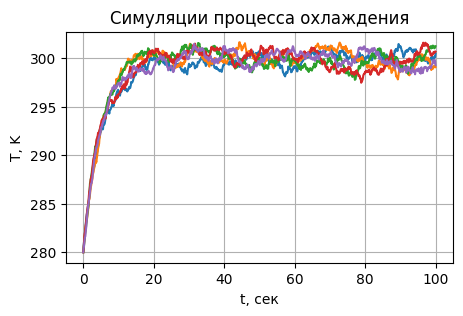

In [11]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts,trajs.T)
plt.show()

В первые 20 секунд мы видим быстрый рост температуры. После этого все траектории приближаются к температуре окружающей среды и начинают колебаться около 300 К. Также мы наблюдаем небольшие колебания после 20 секунд связанные с добавленным случайным шумом.

Анализируя график мы видим, что все траектории следуют ожидаемому поведению, тела постепенно приближаются к температуре окружающей среды и демонстрируют устойчивость на уровне этой температуры.
Все траектории соответствуют параметрам которые мы задали для модели.

### Оценка модели по данным

Допишите метод `fit` в класс модели и оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия. Данные в формате ``pkl``, загружаются как словарь.

In [12]:
with open("./coolingModel.pkl","rb") as f:
    dd = pkl.load(f)
temps = dd['temperature']
Tenv = dd['Tenv']
delta = dd['delta']
finalTime = delta * (len(temps) - 1)

In [13]:
#random init
procModel = CoolingModel(0.1,delta,0.1)
procModel.fit(temps, Tenv)
print(f"Parameters:  r={procModel.r},sigma^2={procModel.sigma2}")

Parameters:  r=0.03608793300832803,sigma^2=0.015218767214311615


Нарисуйте несколько траекторий оценённой модели более тонкими и прозрачными линиями и сравните с вашими данными.

In [14]:
T0 = np.ones(5) * temps[0]
trajs = procModel.simulate(T0, len(temps) - 1, Tenv)

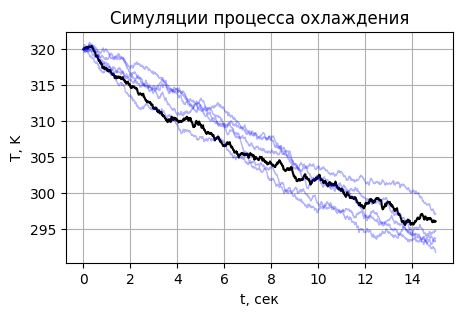

In [15]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts, temps, label="Observed data", color="black")

for traj in trajs:
    ax.plot(ts, traj, color="blue", alpha=0.3, linewidth=1)

plt.show()

На графике видно, что модель охлаждения хорошо воспроизводит наблюдаемые данные. Черная линия, представляющая реальные измерения температуры, плавно снижается, приближаясь к температуре окружающей среды. Симулированные траектории (синие линии) также демонстрируют аналогичный тренд снижения температуры, показывая, что модель адекватно описывает процесс охлаждения.
Наблюдаемая температура остаётся в пределах диапазона симулированных траекторий, что указывает на то, что модель хорошо учитывает случайные колебания в данных.

## Задача 4. Дискретная модель цен (3 балла)

### Броуновское движение

[Броуновское движение (или по-другому Винеровский процесс)](https://en.wikipedia.org/wiki/Wiener_process)  - это случайный процесс (набор случайных величин) $\{W_t\}_{t \geq 0}$ c непрерывным временем, который задётся так:

* $W_0 = 0$

* $W_t - W_s \sim \mathcal{N}(0, t-s)$, $0 \leq s \leq t$

* $W_{t_2} - W_{t_1}$ и $W_{t_4} - W_{t_3}$  независимы для $0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$

Мы можем попытаться нарисовать значения процесса в любом конечном наборе точек $(t_i)_{i=0}^{N_t}$, это будут зависимые случайные величины. Удобнее всего для симуляции пользоваться последним свойством: если обозначить $\Delta t_i = t_{i+1} - t_i$, то

$$
W_{t_{i+1}} = W_{t_i} + \varepsilon_{i+1},
$$

где $W_{t_0}$ задано, а шумы $\varepsilon_{i+1} \sim N(0, \Delta t_i)$ независимы.

### Симуляция

*Реализуйте симуляцию этого дискретизированного процесса $(W_{t_i})_{i=0}^{N_t}$, используя данную сетку по времени $(t_i)_{i=0}^{N_t}$.*

In [16]:
class BrownianMotion:

    def __init__(self):
        pass

    def sample(self, ts, Ntraj):
        """Returns a discrete set of observations

        Args:
            ts (float[]): time grid (T,)
            Ntraj (int): number of trajectories to sample
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        trajs = np.zeros([Ntraj,len(ts)])
        for i in range(1, len(ts)):
            delta_t = ts[i] - ts[i - 1]
            noise = np.random.normal(0, np.sqrt(delta_t), size=Ntraj)
            trajs[:, i] = trajs[:, i - 1] + noise
        return trajs

Проверим! Нарисуйте набор семплов наблюдений $W_{t_0},..,W_{t_{N_{t}}}$ из модели Броуновского движения при $t_0=0$ и $W_{t_0} = 0$.

In [17]:
#example
Ntraj = 50
T=3
Nt = 100#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T]

bmProc = BrownianMotion()
trajs = bmProc.sample(ts,Ntraj)

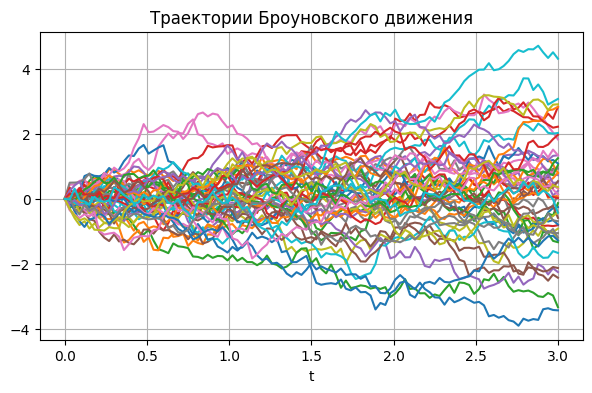

In [18]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории Броуновского движения")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()#if needed

## Геометрическое Броуновское движение

Геометрическое Броуновское движение (GBM) -- это модель

$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t],
$$

где параметр $\mu$ называется сносом (он связан с безрисковой процентной ставкой на рынке и выплатами по активу, например, дивидендами акции), а $\sigma$ -- волатильностью. Это один из базовых кирпичиков моделей финансовых рядов.

Пусть мы пронаблюдали набор значений $S_{t_1},..,S_{t_N}$, давайте получим оценки параметров и попробуем оценить их по данным.


### Параметры

*Определите, какие параметры модели вы будете оценивать.*

### Параметры для оценки

Мы будем оценивать следующие параметры:

+ **$ \mu $**: Этот параметр показывает общий тренд актива — растёт ли его цена в среднем со временем или падает. Можно сказать, что $ \mu $
отражает долгосрочную доходность актива. Чем выше $ \mu $ тем выше ожидаемая прибыль от актива в будущем.
  
+ **$ \sigma $**: Этот параметр отражает степень изменчивости актива. Высокое значение $ \sigma $ указывает на большую нестабильность цен актива, а низкое на меньшую изменчивость. Волатильность важна для оценки риска актива.

Эти параметры являются основными характеристиками модели геометрического Броуновского движения и оказывают значительное влияние на поведение актива. Поэтому мы и будем их оценивать.

### Правдоподобие

*Запишите функцию правдоподобия для модели данных и ее логарифм.*

### Логарифм модели

Для упрощения работы с моделью возьмем натуральный логарифм обеих частей:

$$
\ln S_t = \ln S_0 + \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t
$$

Это уравнение выражает натуральный логарифм цены $ \ln S_t $ как линейную функцию от времени $ t $ с добавлением случайного компонента $ \sigma W_t $.

### Приращения логарифма цены

Рассмотрим, как изменяется $ \ln S_t $ между двумя соседними моментами времени $ t_{i-1} $ и $ t_i $:

$$
\ln \frac{S_{t_i}}{S_{t_{i-1}}} = \ln S_{t_i} - \ln S_{t_{i-1}} = \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1} + \sigma (W_{t_i} - W_{t_{i-1}})
$$

где $ \Delta t_{i-1} = t_i - t_{i-1} $ — временной интервал между соседними точками.

Так как $ W_{t_i} - W_{t_{i-1}} \sim N(0, \Delta t_{i-1}) $, мы получаем, что

$$
\ln \frac{S_{t_i}}{S_{t_{i-1}}} \sim N\left(\left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}, \sigma^2 \Delta t_{i-1}\right)
$$

### Функция правдоподобия

Теперь, имея наблюдения $ S_{t_0}, S_{t_1}, \dots, S_{t_N} $, мы можем записать функцию правдоподобия. Из предположения о независимости приращений броуновского движения, правдоподобие является произведением плотностей нормального распределения для каждого шага:

$$
L(\mu, \sigma | S_{t_0}, \dots, S_{t_N}) = \prod_{i=1}^N f\left(\ln \frac{S_{t_i}}{S_{t_{i-1}}}; \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}, \sigma^2 \Delta t_{i-1}\right)
$$

где плотность $ f(x; m, v) $ нормального распределения с математическим ожиданием $ m $ и дисперсией $ v $ равна

$$
f(x; m, v) = \frac{1}{\sqrt{2 \pi v}} \exp\left(-\frac{(x - m)^2}{2 v}\right)
$$

Подставим это в правдоподобие:

$$
L(\mu, \sigma | S_{t_0}, \dots, S_{t_N}) = \prod_{i=1}^N \frac{1}{\sqrt{2 \pi \sigma^2 \Delta t_{i-1}}} \exp\left(-\frac{\left(\ln \frac{S_{t_i}}{S_{t_{i-1}}} - \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}\right)^2}{2 \sigma^2 \Delta t_{i-1}}\right)
$$

### Логарифм функции правдоподобия

Для удобства работы возьмем логарифм функции правдоподобия:

$$
\ln L(\mu, \sigma | S_{t_0}, \dots, S_{t_N}) = \sum_{i=1}^N \left( -\frac{1}{2} \ln(2 \pi \sigma^2 \Delta t_{i-1}) - \frac{\left(\ln \frac{S_{t_i}}{S_{t_{i-1}}} - \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}\right)^2}{2 \sigma^2 \Delta t_{i-1}} \right)
$$

Теперь мы готовы перейти к оценкам максимального правдоподобия для $ \mu $ и $ \sigma $.

### ММП-оценки

*Найдите выражение для ММП-оценок параметров.*

### Оценка для $ \mu $

Продифференцируем логарифм функции правдоподобия по $ \mu $:

$$
\frac{\partial \ln L(\mu, \sigma)}{\partial \mu} = \sum_{i=1}^N \frac{\left(\ln \frac{S_{t_i}}{S_{t_{i-1}}} - \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}\right) \Delta t_{i-1}}{\sigma^2 \Delta t_{i-1}}
$$

Упростим выражение:

$$
\frac{\partial \ln L(\mu, \sigma)}{\partial \mu} = \sum_{i=1}^N \frac{\ln \frac{S_{t_i}}{S_{t_{i-1}}} - \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}}{\sigma^2} = 0
$$

Переносим $ \mu $ в правую часть уравнения, умножив обе стороны на $ \sigma^2 $:

$$
\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}} = \sum_{i=1}^N \left(\mu - \frac{\sigma^2}{2}\right) \Delta t_{i-1}.
$$

Теперь раскроем скобки в правой части:

$$
\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}} = \mu \sum_{i=1}^N \Delta t_{i-1} - \frac{\sigma^2}{2} \sum_{i=1}^N \Delta t_{i-1}.
$$

Теперь выразим $ \mu $ из этого уравнения. Переносим все члены с $ \mu $ в одну часть уравнения, а оставшиеся — в другую:

$$
\mu \sum_{i=1}^N \Delta t_{i-1} = \sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}} + \frac{\sigma^2}{2} \sum_{i=1}^N \Delta t_{i-1}
$$

Теперь делим обе стороны уравнения на $ \sum_{i=1}^N \Delta t_{i-1} $, чтобы изолировать $ \mu $:

$$
\hat{\mu} = \frac{\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}}}{\sum_{i=1}^N \Delta t_{i-1}} + \frac{\sigma^2}{2}
$$

Таким образом, мы получили оценку для $ \mu $:

$$
\hat{\mu} = \frac{\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}}}{\sum_{i=1}^N \Delta t_{i-1}} + \frac{\sigma^2}{2}
$$

### Оценка для $ \sigma $

Для нахождения оценки $ \sigma $ продифференцируем логарифм функции правдоподобия по $ \sigma $ и упростим выражение.

Продифференцируем логарифм функции правдоподобия:

$$
\frac{\partial \log L(\mu, \sigma)}{\partial \sigma} = -\frac{N}{\sigma} - \sum_{i=1}^N \left( \frac{\left(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1} + \frac{\sigma^2}{2} \Delta t_{i-1}\right)^2}{2 \sigma^2 \Delta t_{i-1}} \right) = 0
$$

Рассчитываем производную по $ \sigma $ для упрощения:

$$
-\frac{N}{\sigma} - \sum_{i=1}^N \left( \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2 + 2 (\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1}) \cdot \frac{\sigma^2}{2} \Delta t_{i-1} + \frac{\sigma^4}{4} (\Delta t_{i-1})^2}{2 \sigma^2 \Delta t_{i-1}} \right)
$$

После дальнейших преобразований:

$$
-\frac{N}{\sigma} - \sum_{i=1}^N \left( \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{2 \sigma^2 \Delta t_{i-1}} + \frac{\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1}}{2} + \frac{\sigma^2 \Delta t_{i-1}}{8} \right)
$$

Ещё раз упростим, получив:

$$
-N \cdot \sigma^2 - \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}} - \frac{\sigma^4}{4} \sum_{i=1}^N \Delta t_{i-1} = 0
$$

Решаем полученное квадратное уравнение относительно $ \sigma^2 $:

$$
\frac{t_N - t_0}{4} \cdot \sigma^4 + N \cdot \sigma^2 + \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}} = 0
$$

####Теперь вычислим дискриминант и решим уравнение

Находим дискриминант:

$$
D = N^2 - 4 \cdot \frac{t_N - t_0}{4} \cdot \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}} = N^2 - (t_N - t_0) \cdot \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}
$$

Тогда оценка для $ \sigma^2 $ будет:

$$
\widehat{\sigma^2} = \frac{-N + \sqrt{N^2 - (t_N - t_0) \cdot \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}}}{\frac{t_N - t_0}{2}}
$$

или, после упрощения,

$$
\widehat{\sigma^2} = \frac{-N + \sqrt{N^2 + (t_N - t_0) \cdot \sum_{i=1}^N \frac{(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}}}{\frac{t_N - t_0}{2}}
$$

###Теперь подставим найденное выражение для $\sigma^2$ в оценку для $\mu$ и упростим выражение.

Оценка для $\mu$ имеет вид:
$$
\hat{\mu} = \frac{\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}}}{\sum_{i=1}^N \Delta t_{i-1}} + \frac{\sigma^2}{2}
$$

Подставляем оценку для $\sigma^2$:

$$
\widehat{\sigma^2} = \frac{-N + \sqrt{N^2 + (t_N - t_0) \cdot \sum_{i=1}^N \frac{(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}}}{\frac{t_N - t_0}{2}}
$$

Подставляем это выражение в оценку для $\mu$:

$$
\hat{\mu} = \frac{\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}}}{\sum_{i=1}^N \Delta t_{i-1}} + \frac{1}{2} \cdot \frac{-N + \sqrt{N^2 + (t_N - t_0) \cdot \sum_{i=1}^N \frac{(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}}}{\frac{t_N - t_0}{2}}
$$

Умножаем дробь на $\frac{1}{2}$:

$$
\hat{\mu} = \frac{\sum_{i=1}^N \ln \frac{S_{t_i}}{S_{t_{i-1}}}}{\sum_{i=1}^N \Delta t_{i-1}} + \frac{-N + \sqrt{N^2 + (t_N - t_0) \cdot \sum_{i=1}^N \frac{(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}}}{t_N - t_0}
$$

Теперь решим уравнение для $\mu$:

\begin{align*}
    (t_N - t_0) \mu - (\ln S_N - \ln S_0) + N &= \sqrt{N^2 - (t_N - t_0) \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}} \\
    \left( (t_N - t_0) \mu + \ln \frac{S_0}{S_N} + N \right)^2 &= N^2 - (t_N - t_0) \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}} \\
    ((t_N - t_0) \mu + \ln \frac{S_0}{S_N})^2 + 2 ((t_N - t_0) \mu + \ln \frac{S_0}{S_N})  N + N^2 &= N^2 - (t_N - t_0)  \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}} \\
    ((t_N - t_0) \mu)^2 + 2  (t_N - t_0) \mu  \ln \frac{S_0}{S_N} + (\ln \frac{S_0}{S_N})^2 + 2 N  (t_N - t_0) \mu + 2N  \ln \frac{S_0}{S_N} &= - (t_N - t_0)  \sum_{i=1}^N \frac{-(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}} \\
    (t_N - t_0)^2 \mu^2 + 2  (t_N - t_0)  \ln \frac{S_0}{S_N} + 2N  (t_N - t_0)  \ln \frac{S_0}{S_N} &= (t_N - t_0) \sum_{i=1}^N \frac{(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}
\end{align*}

$$
\mu^2 (t_n - t_0)^2 + 2n \hat{\mu} (t_n - t_0) - 2 \mu (t_n - t_0) \ln \frac{S_{t_n}}{S_{t_0}} - 2n \ln \frac{S_{t_n}}{S_{t_0}} + \ln^2 \frac{S_{t_n}}{S_{t_0}} = (t_n - t_0) \sum_{i=1}^{n} \ln^2 \frac{S_{t_i}}{S_{t_{i-1}}} \Delta t_{i-1} - 2(t_n - t_0) \hat{\mu} \ln \frac{S_{t_n}}{S_{t_0}} + \hat{\mu}^2 (t_n - t_0)^2
$$

$$
2n \hat{\mu} (t_n - t_0) - 2n \ln \frac{S_{t_n}}{S_{t_0}} + \ln^2 \frac{S_{t_n}}{S_{t_0}} = (t_n - t_0) \sum_{i=1}^{n} \frac{\ln^2 \frac{S_{t_i}}{S_{t_{i-1}}}}{\Delta t_{i-1}}
$$

$$
\hat{\mu} - \frac{\ln \frac{S_{t_n}}{S_{t_0}}}{t_n - t_0} + \frac{\ln^2 \frac{S_{t_n}}{S_{t_0}}}{2n (t_n - t_0)} = \frac{1}{2n} \sum_{i=1}^{n} \frac{\ln^2 \frac{S_{t_i}}{S_{t_{i-1}}}}{\Delta t_{i-1}}
$$

$$
\hat{\mu} = \frac{1}{2N} \sum_{i=1}^{N} \frac{\left( \ln \frac{S_{i}}{S_{i-1}} \right)^2}{\Delta t_{i-1}} - \frac{\left( \ln \frac{S_0}{S_N} \right)^2}{2N \cdot (t_N - t_0)} - \frac{\ln \frac{S_0}{S_N}}{t_N - t_0}
$$

Итог:

$$
\hat{\mu} = \frac{1}{2N} \sum_{i=1}^{N} \frac{\left( \ln \frac{S_{i}}{S_{i-1}} \right)^2}{\Delta t_{i-1}} - \frac{\left( \ln \frac{S_0}{S_N} \right)^2}{2N \cdot (t_N - t_0)} - \frac{\ln \frac{S_0}{S_N}}{t_N - t_0}
$$

$$
\widehat{\sigma^2} = \frac{-N + \sqrt{N^2 + (t_N - t_0) \cdot \sum_{i=1}^N \frac{(\ln S_i - \ln S_{i-1} - \mu \Delta t_{i-1})^2}{\Delta t_{i-1}}}}{\frac{t_N - t_0}{2}}
$$

### Пишем модель

In [45]:
class GBM:

    def __init__(self,mu,sigma):
        self.mu = mu
        self.sigma = sigma
        self.brownMotion = BrownianMotion()

    def sample(self, x0, ts):
        """Returns a discrete set of observations

        Args:
            x0 (float[]): set of initial conditions x_{ts[0]}  (Ntraj,)
            ts (float[]): time grid (T,)
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        Ntraj = x0.shape[0]
        Nt = len(ts)
        trajs = np.zeros((Ntraj, Nt))
        trajs[:, 0] = x0
        lnS = np.log(x0)
        delta_ts = np.diff(ts)
        for i in range(1, Nt):
            delta_t = delta_ts[i - 1]
            mu_adj = self.mu - 0.5 * self.sigma ** 2
            Z = np.random.normal(0, 1, Ntraj)
            lnS = lnS + mu_adj * delta_t + self.sigma * np.sqrt(delta_t) * Z
            trajs[:, i] = np.exp(lnS)
        return trajs

    def fit(self, st, delta):
        """Fits the parameters given the data (assuming the step size is constant and equal delta)

        Args:
            st (float[]): observations (T,)
            delta (flaot): time step size
        """
        N = len(st) - 1
        T = N * delta
        log_S = np.log(st)
        log_returns = np.diff(log_S)

        sum1 = np.sum((log_returns ** 2) / delta)

        ln_SN_S0 = log_S[-1] - log_S[0]
        sum2 = ln_SN_S0 ** 2

        self.mu = (1 / (2 * N)) * sum1 - (sum2) / (2 * N * T) + ln_SN_S0 / T
        sum3 = np.sum(((log_returns - self.mu * delta) ** 2) / delta)

        numerator = -N + np.sqrt(N ** 2 + T * sum3)
        denominator = T / 2
        sigma2_hat = numerator / denominator

        self.sigma = np.sqrt(sigma2_hat)

Протестируем.

In [46]:
#example
Ntraj = 50
T=50
Nt = 5000#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T]

mu=0.02
sigma=0.27
gbmProc = GBM(mu, sigma)

x0 = np.ones([Ntraj])*100
trajs = gbmProc.sample(x0,ts)

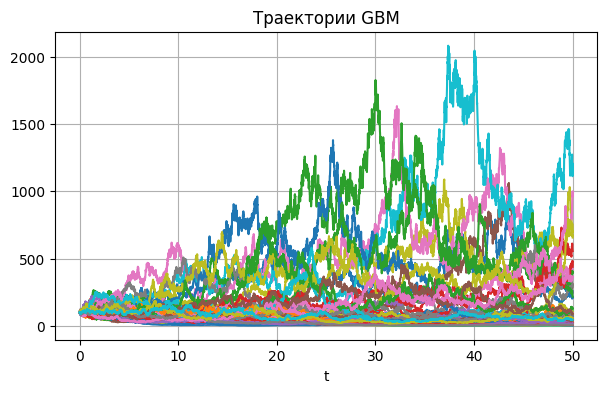

In [47]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()#if needed

### Оценка модели по данным

Допишите метод `fit` в класс модели и оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия. Данные в формате ``pkl``, загружаются как словарь.

In [48]:
# load data
with open("./gbmData.pkl", "rb") as f:
    dd=pkl.load(f)
st = dd['value']
ts = dd['time']
delta = ts[1] - ts[0]

In [49]:
#random init
gbmProc = GBM(0.01, 0.01)
gbmProc.fit(st, delta)

print('mu_MLE', gbmProc.mu)
print('sigma_MLE', gbmProc.sigma)

mu_MLE 0.08419912929329919
sigma_MLE 0.19546453929856897


Нарисуйте несколько траекторий оценённой модели более тонкими и прозрачными линиями и сравните с вашими данными.

In [50]:
#generating new trajectories
Ntraj = 10

x0 = np.ones(Ntraj) * st[0]
trajs = gbmProc.sample(x0, ts)

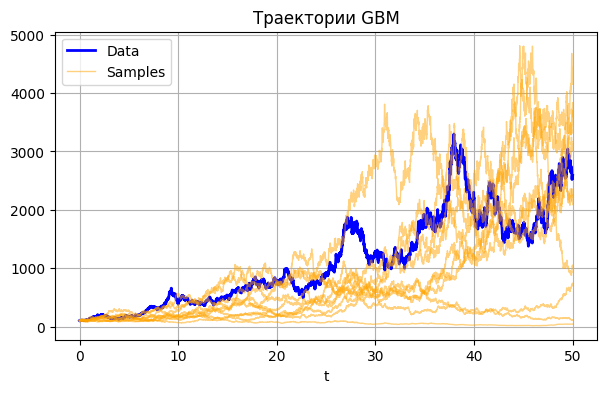

In [51]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts, st, label="Data", color="blue", linewidth=2)
for i in range(Ntraj):
    ax.plot(ts, trajs[i], color="orange", alpha=0.5, linewidth=1)
ax.legend(["Data","Samples"])
plt.show()#if needed

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

На графике представлены реальные данные (синяя линия) и несколько сгенерированных траекторий (оранжевые линии), смоделированных с использованием геометрического броуновского движения. Видно, что модель достаточно точно передаёт общий тренд реальных данных, а также их волатильность и случайные колебания.

Некоторые сгенерированные траектории заметно отклоняются, особенно на поздних этапах. Это происходит потому, что модель использует случайные изменения, и со временем предсказания становятся менее точными. Модель хорошо подходит для понимания общего направления и разброса данных, и все же она более точна на коротком промжутке времени.